In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('ex2data1.txt')
data.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [3]:
extra_data = pd.DataFrame([float(data.columns[0]), float(data.columns[1]), int(data.columns[2])]).T
extra_data


,0,1,2
0,34.62366,78.024693,0.0


In [4]:
data.columns = ['Exam 1 Score', 'Exam 2 Score', 'Admitted']
extra_data.columns = data.columns

combined = data.append(extra_data, ignore_index=True)
combined.tail()

,Exam 1 Score,Exam 2 Score,Admitted
95,42.261701,87.103851,1.0
96,99.315009,68.775409,1.0
97,55.340018,64.931938,1.0
98,74.775893,89.529813,1.0
99,34.623660,78.024693,0.0


In [5]:
combined.shape

(100, 3)

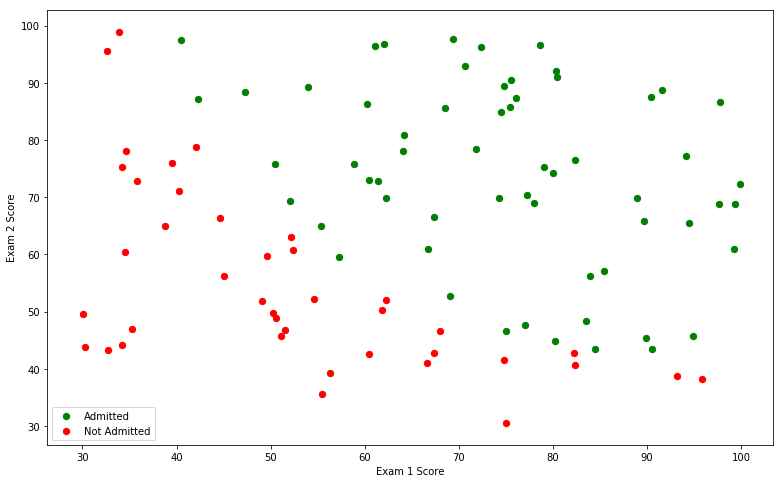

In [6]:
plt.figure(figsize=(13,8))
ax = plt.subplot()
ax.scatter(combined['Exam 1 Score'].loc[combined['Admitted'] == 1], combined['Exam 2 Score'].loc[combined['Admitted'] == 1],
          c='g', s=40)
ax.scatter(combined['Exam 1 Score'].loc[combined['Admitted'] == 0], combined['Exam 2 Score'].loc[combined['Admitted'] == 0],
          c='r', s=40)
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.legend(['Admitted', 'Not Admitted'], scatterpoints=1, loc='lower left')

### Sigmoid Function

In [7]:
def sigmoid(z):
    return 1/(1 + (np.e)**(-z))

In [8]:
sigmoid(10)

0.9999546021312976

In [9]:
sigmoid(-10)

4.539786870243442e-05

In [10]:
sigmoid(0)

0.5

In [11]:
practice_v = np.array([0, 10])

In [12]:
sigmoid(practice_v)

array([ 0.5      ,  0.9999546])

In [13]:
practice_m = np.array([[2,3], [3,2]])

In [14]:
sigmoid(practice_m)

array([[ 0.88079708,  0.95257413],
       [ 0.95257413,  0.88079708]])

### Process DataFrame

In [15]:
target = combined['Admitted']
X_vals = combined.drop(['Admitted'], axis=1)


In [16]:
def process_dataframe():
    
    global combined
    
    df = combined.drop(['Admitted'], axis=1)
    X_vals = df.values
    ones = np.ones([len(combined), 1])
    X = np.concatenate([ones, X_vals], axis=1)
    y = np.array(combined['Admitted']).T
    
    theta = np.zeros([len(df.columns) + 1, 1])
    
    return X, y, theta

In [17]:
X, y, theta = process_dataframe()

In [18]:
X, y, theta

(array([[  1.        ,  30.28671077,  43.89499752],
        [  1.        ,  35.84740877,  72.90219803],
        [  1.        ,  60.18259939,  86.3085521 ],
        [  1.        ,  79.03273605,  75.34437644],
        [  1.        ,  45.08327748,  56.31637178],
        [  1.        ,  61.10666454,  96.51142588],
        [  1.        ,  75.02474557,  46.55401354],
        [  1.        ,  76.0987867 ,  87.42056972],
        [  1.        ,  84.43281996,  43.53339331],
        [  1.        ,  95.86155507,  38.22527806],
        [  1.        ,  75.01365839,  30.60326323],
        [  1.        ,  82.30705337,  76.4819633 ],
        [  1.        ,  69.36458876,  97.71869196],
        [  1.        ,  39.53833914,  76.03681085],
        [  1.        ,  53.97105215,  89.20735014],
        [  1.        ,  69.07014406,  52.74046973],
        [  1.        ,  67.94685548,  46.67857411],
        [  1.        ,  70.66150955,  92.92713789],
        [  1.        ,  76.97878373,  47.57596365],
        [  1

### Hypothesis Function

In [19]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X,theta))

In [20]:
print(X.shape)
print(theta.T.shape)

(100, 3)
(1, 3)


In [21]:
hypothesis(X, theta)[:5]

array([[ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5]])

In [22]:
(hypothesis(X,theta)).shape

(100, 1)

### Cost Function and Gradient

In [23]:
def cost_function(theta,x,y):
    m, n = x.shape 
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    term1 = np.log(hypothesis(x, theta))
    term2 = np.log(1 - hypothesis(x, theta))
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2
    J = -((np.sum(term))/m)
    
    return J

In [24]:
theta

array([[ 0.],
       [ 0.],
       [ 0.]])

In [25]:
cost_function(theta, X, y)

0.69314718055994529

In [26]:
def gradient(theta,x,y):
    m , n = x.shape
    theta = theta.reshape((n,1));
    y = y.reshape((m,1))
    sigmoid_x_theta = sigmoid(x.dot(theta))
    grad = ((x.T).dot(sigmoid_x_theta-y))/m
    return grad.flatten()

In [27]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [28]:
import scipy.optimize as op

In [29]:
result = op.minimize(fun=cost_function, x0=theta, args=(X, y),
                    method= 'TNC', jac=gradient)

In [30]:
result

     fun: 0.20349770158947533
     jac: array([  9.22361572e-09,   1.06323770e-07,   4.79775829e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131847,   0.20623159,   0.20147148])

In [31]:
new_theta = result.x

In [32]:
def get_weights(theta):
    return theta[0], theta[0], theta[0]
        
    

In [33]:
w0, w1, w2 = get_weights(new_theta)

In [34]:
X1 = np.array([b[1] for b in X])

In [35]:
X1

array([ 30.28671077,  35.84740877,  60.18259939,  79.03273605,
        45.08327748,  61.10666454,  75.02474557,  76.0987867 ,
        84.43281996,  95.86155507,  75.01365839,  82.30705337,
        69.36458876,  39.53833914,  53.97105215,  69.07014406,
        67.94685548,  70.66150955,  76.97878373,  67.37202755,
        89.67677575,  50.53478829,  34.21206098,  77.92409145,
        62.27101367,  80.19018075,  93.1143888 ,  61.83020602,
        38.7858038 ,  61.37928945,  85.40451939,  52.10797973,
        52.04540477,  40.23689374,  54.63510555,  33.91550011,
        64.17698887,  74.78925296,  34.18364003,  83.90239366,
        51.54772027,  94.44336777,  82.36875376,  51.04775177,
        62.22267576,  77.19303493,  97.77159928,  62.0730638 ,
        91.5649745 ,  79.94481794,  99.27252693,  90.54671411,
        34.52451385,  50.28649612,  49.58667722,  97.64563396,
        32.57720017,  74.24869137,  71.79646206,  75.39561147,
        35.28611282,  56.2538175 ,  30.05882245,  44.66

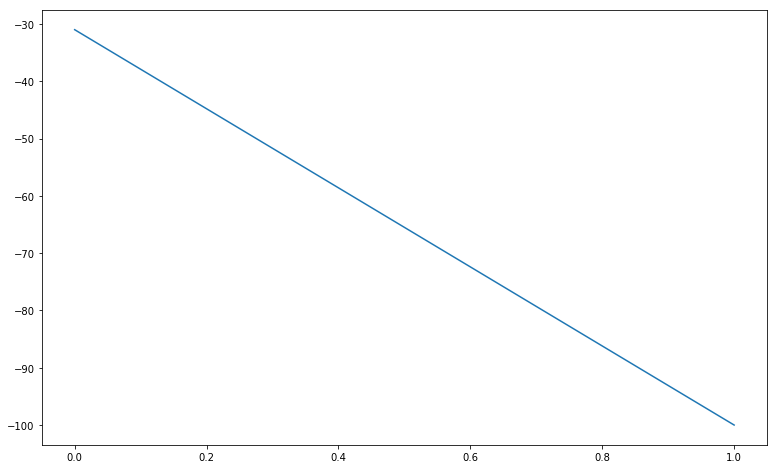

In [36]:
plt.figure(figsize=(13,8))
ax = plt.subplot()
X0 = np.array([30,99])
ax.plot((-w0/w2) - (w1*X0)/w2)

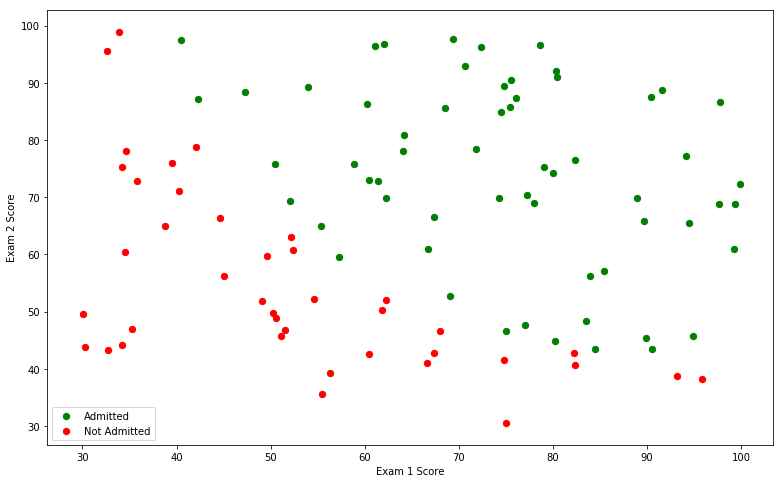

In [37]:
plt.figure(figsize=(13,8))
ax = plt.subplot()

ax.scatter((combined['Exam 1 Score'].loc[combined['Admitted'] == 1]), combined['Exam 2 Score'].loc[combined['Admitted'] == 1],
          c='g', s=40)
ax.scatter(combined['Exam 1 Score'].loc[combined['Admitted'] == 0], combined['Exam 2 Score'].loc[combined['Admitted'] == 0],
          c='r', s=40)


X1_vals = np.array([combined['Exam 1 Score'].min(), combined['Exam 1 Score'].max()])


#ax.plot((-w0/w2) - (w1*X1_vals)/w2)


ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.legend(['Admitted', 'Not Admitted'], scatterpoints=1, loc='lower left')

In [38]:
X[:, 1].shape

(100,)

In [39]:
y[:].shape

(100,)

In [40]:
hypothesis([1, 45, 85], new_theta)

0.77629062105758517

In [41]:
accuracy = ((hypothesis(X, new_theta).round()) == y).mean()

In [42]:
accuracy

0.89000000000000001

Logistic Regression has an 89% accuracy on the training set.

## Regularized Logistic Regression

In [43]:
data = pd.read_csv("ex2data2.txt")

In [44]:
data.head()

,0.051267,0.69956,1
0,-0.092742,0.68494,1
1,-0.213710,0.69225,1
2,-0.375000,0.50219,1
3,-0.513250,0.46564,1
4,-0.524770,0.20980,1


In [45]:
ex = pd.DataFrame([float(data.columns[0]), float(data.columns[1]), int(data.columns[2])]).T
ex.columns = ['Microchip Test 1', 'Microchip Test 2', 'Result']
data.columns = ex.columns
data = data.append(ex, ignore_index=True)
ex


,Microchip Test 1,Microchip Test 2,Result
0,0.051267,0.69956,1.0


In [46]:
data.tail()

,Microchip Test 1,Microchip Test 2,Result
113,-0.593890,0.494880,0.0
114,-0.484450,0.999270,0.0
115,-0.006336,0.999270,0.0
116,0.632650,-0.030612,0.0
117,0.051267,0.699560,1.0


In [47]:
X = np.array(data.values)
X

array([[-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0.59389  ,  0.005117 ,  1.       ],
       [-0

In [48]:
X_pass = np.array([[a[0], a[1]] for a in X if a[2] == 1])
X_fail = np.array([[a[0], a[1]] for a in X if a[2] == 0])

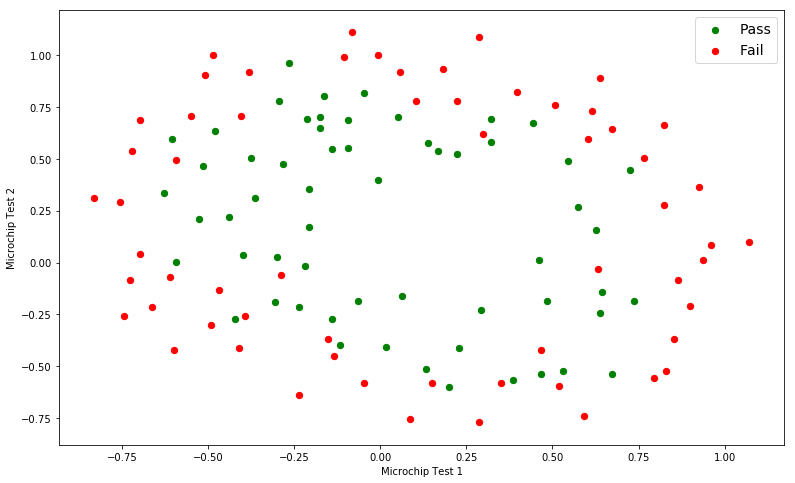

In [49]:
plt.figure(figsize=(13,8))
ax = plt.subplot()
ax.scatter(X_pass[:, 0], X_pass[:, 1], c='g', s=40)
ax.scatter(X_fail[:, 0], X_fail[:, 1], c='r', s=40)
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.legend(('Pass', 'Fail'), numpoints=1, fontsize=14)

### Feature Mapping

In [50]:
y = X[:, 2]
X_val = X[:, :2]

In [51]:
X_val

array([[-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0.26555  ,  0.96272  ],
       [-0

In [52]:
def map_features(x1, x2):
    '''
    Maps the two input features to quadratic features
    
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    
    Inputs X1, X2 must be the same size
    '''
    
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))
    
    m, n = out.shape
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)
    
    return out
    
    

In [53]:
X_mapped = map_features(X[:, 0], X[:, 1])

In [54]:
X_mapped

array([[  1.00000000e+00,  -9.27420000e-02,   6.84940000e-01, ...,
          1.89305413e-03,  -1.39810280e-02,   1.03255971e-01],
       [  1.00000000e+00,  -2.13710000e-01,   6.92250000e-01, ...,
          1.04882142e-02,  -3.39734512e-02,   1.10046893e-01],
       [  1.00000000e+00,  -3.75000000e-01,   5.02190000e-01, ...,
          8.94406151e-03,  -1.19776487e-02,   1.60401477e-02],
       ..., 
       [  1.00000000e+00,  -6.33640000e-03,   9.99270000e-01, ...,
          4.00328554e-05,  -6.31330588e-03,   9.95627986e-01],
       [  1.00000000e+00,   6.32650000e-01,  -3.06120000e-02, ...,
          3.51474517e-07,  -1.70067777e-08,   8.22905998e-10],
       [  1.00000000e+00,   5.12670000e-02,   6.99560000e-01, ...,
          6.29470940e-04,   8.58939846e-03,   1.17205992e-01]])

In [55]:
X_mapped.shape

(118, 28)

### Regularized Cost Function and Gradient

In [56]:
m, n = X_mapped.shape
theta1 = np.zeros([n, 1])

In [57]:
def reg_cost_function(X, y, theta, lambda_=0):
    
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    
    term1 = -y*np.log(hypothesis(X, theta))
    term2 = np.log(1 - hypothesis(X, theta))
    term1 = term1.reshape((m, 1))
    term2 = term2.reshape((m, 1))
    reg = ((lambda_ / 2 * m) * np.sum(theta[1:]**2))
    
    J = (np.sum(term1 - (1 - y) * term2) / m) + reg
    
    return J

In [58]:
reg_cost_function(X_mapped, y, theta1)

0.6931471805599454

In [110]:
def reg_gradient(X, y, theta, lambda_=0):
    m, n = X.shape
    thetaR = theta[1:, 0]
    y = y.reshape((m, 1))
    delta = hypothesis(X, theta) - y
    sum_delta = delta.T.dot(X[:, 0])
    grad1 = (1.0 / m) * sum_delta
    
    XR = X[:, 1:X.shape[1]]
    sum_delta = delta.T.dot(XR)
    
    grad = (1.0 / m) * (sum_delta + lambda_ * thetaR)
    
    out = np.zeros((grad.shape[0], grad.shape[1] + 1))
    
    out[:, 0] = grad1
    out[:, 1:] = grad
    
    return out.T.flatten()

In [111]:
reg_gradient(X_mapped, y, theta1)

array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
         1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
         1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
         5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
         3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
         4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
         3.87936363e-02])

In [112]:
reg_gradient(X_mapped, y, theta1).round()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [113]:
cost = reg_cost_function(X_mapped, y, theta1, lambda_=1)

In [114]:
cost

0.6931471805599454

In [115]:
grad = reg_gradient(X_mapped, y, theta1, lambda_=0)

In [116]:
grad.round()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [117]:
def decorated_cost(theta):
    return reg_cost_function(X_mapped, y, theta, lambda_=0)

In [118]:
from scipy.optimize import fmin_bfgs

In [119]:
result = fmin_bfgs(decorated_cost, theta1, maxiter=1000)

         Current function value: 0.238236
         Iterations: 538
         Function evaluations: 19271
         Gradient evaluations: 642


In [120]:
result.round()

array([   27.,    42.,    35.,  -272.,  -133.,  -127.,  -304.,  -390.,
        -255.,  -113.,   925.,   899.,  1191.,   510.,   231.,   515.,
         958.,  1141.,   824.,   341.,   112., -1041., -1588., -2496.,
       -1984., -1586.,  -593.,  -174.])

In [121]:
new = reg_cost_function(X_mapped, y, result, lambda_=0.0)

In [122]:
new

0.23823637691390062

In [123]:
old = reg_cost_function(X_mapped, y, theta1, lambda_=1)

In [124]:
old

0.6931471805599454

In [125]:
old - new

0.45491080364604475